# Gaussian pulse

In [1]:
import sys
sys.path.append('../..') # Asegúrate de que Python pueda encontrar el paquete src


# import libraries
import numpy as np
from typing import Dict, Any
import matplotlib.pyplot as plt
import scienceplots

from src.physics.pulses import GaussianPulse1D, GaussianPulse2D,  format_value

plt.style.use(['science', 'notebook'])
plt.style.use('dark_background')
# plt.rcParams.update({'figure.dpi': '200'})

In [2]:
def gaussian(x, x0, sigma):
    return np.exp(-(x - x0)**2 / (4*sigma**2))

### In Wavelenght
---

In [3]:
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

sigma_wavelength = input_width_wl / (2*np.sqrt(2*np.log(2)))  # 18.70 (nm)
times = 6
steps = 500
wavelength = np.linspace(fundamental_wavelength - times*sigma_wavelength, fundamental_wavelength + times*sigma_wavelength, steps)
A_input_beam = gaussian(wavelength, fundamental_wavelength, sigma_wavelength)
I_input_beam = np.abs(A_input_beam)**2

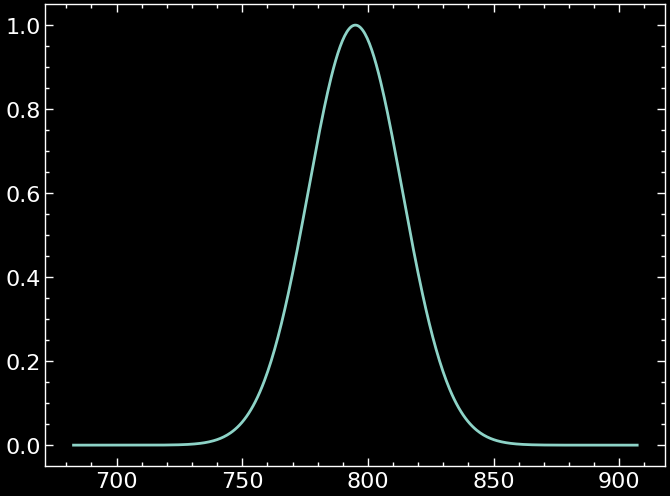

FWHM in wavelength: 43.59 nm


In [4]:
plt.plot(wavelength*1e9, I_input_beam)
plt.show()

# FWHM in wavelength
index = np.where(I_input_beam >= 0.5)[0]
FWHM_wl = (wavelength[index[-1]] - wavelength[index[0]]) * 1e9
print(f"FWHM in wavelength: {FWHM_wl:.2f} nm")

### In frecuency
---

In [5]:
# Parameters in frequency
c = 299792458  # (m/s)
fundamental_frequency = (2*np.pi*c) / fundamental_wavelength  # (Hz = 1/s) | 23.69 PHz
sigma_frequency = (2*np.pi*c) / (fundamental_wavelength**2) * sigma_wavelength  # (Hz) | 55.69 PHz

times_f = 5
omega = np.linspace(fundamental_frequency - times_f*sigma_frequency, fundamental_frequency + times_f*sigma_frequency, steps)
A_input_frequency_beam = gaussian(omega, fundamental_frequency, sigma_frequency)
I_input_frequency = np.abs(A_input_frequency_beam)

In [6]:
index_f = np.where(I_input_frequency >= 0.5)[0]
FWHM_f = (omega[index_f[-1]] - omega[index_f[0]])  
print(f"FWHM in frequency: {FWHM_f*1e-12:.2f} PHz")

FWHM in frequency: 184.14 PHz


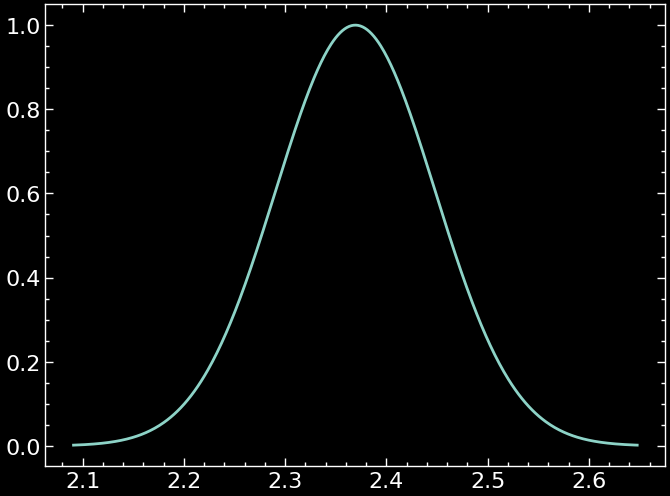

In [7]:
plt.plot(omega*1e-15, I_input_frequency)
plt.show()

# Class test
---

In [8]:
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

input_pulse = GaussianPulse1D(x0=fundamental_wavelength, FWHM=input_width_wl, steps=1000)
wavelenght, y_wavelenght = input_pulse.generate_intensity()

# Obtener el diccionario con los parámetros del pulso
pulse_dict = input_pulse.as_dict()
for key, value in pulse_dict.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")


Center: 7.95e-07
Fwhm: 4.40e-08
Sigma: 1.87e-08
Steps: 1000
Times Std: 5
Computed Fwhm: 4.40e-08


In [9]:
# Parameters in frequency
c = 299792458  # (m/s)
fundamental_frequency = (2*np.pi*c) / fundamental_wavelength  # (Hz = 1/s) | 23.69 PHz
sigma_frequency = (2*np.pi*c) / (fundamental_wavelength**2) * sigma_wavelength  # (Hz) | 55.69 PHz

input_pulse_omega = GaussianPulse1D(x0=fundamental_frequency, steps=1000, std=sigma_frequency)
frequencies, A_omega_norm = input_pulse_omega.generate_pulse()
frequencies, I_omega_norm = input_pulse_omega.generate_intensity()

# with no normalization
frequencies, A_omega = input_pulse_omega.generate_pulse(normalization=False)
frequencies, I_omega = input_pulse_omega.generate_intensity(normalization=False)

# Obtener el diccionario con los parámetros del pulso
pulse_dict_omega = input_pulse_omega.as_dict()
for key, value in pulse_dict_omega.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")
    


Center: 2.37e+15
Fwhm: None
Sigma: 5.57e+13
Steps: 1000
Times Std: 5
Computed Fwhm: 1.31e+14


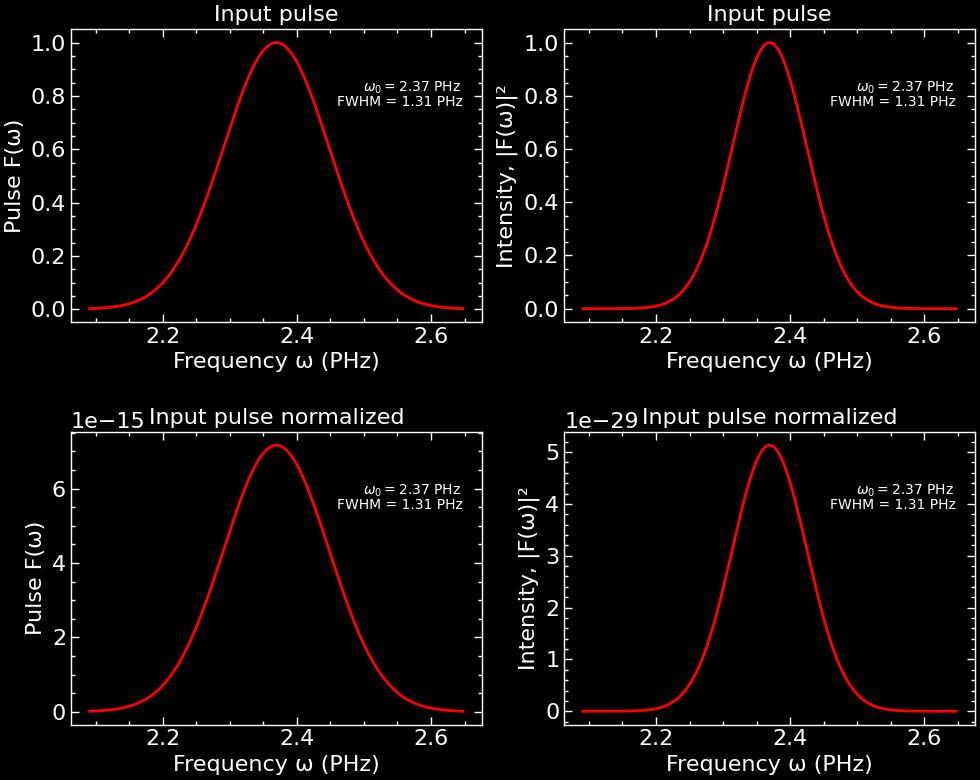

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfica (a): Pulso de entrada vs omega
axs[0, 0].plot(frequencies*1e-15, A_omega, color='red', linestyle='-')
axs[0, 0].set_ylabel('Pulse F(ω)')
axs[0, 0].set_xlabel('Frequency ω (PHz)')
axs[0, 0].set_title('Input pulse')
# Agregar texto en la gráfica (b)
axs[0, 0].text(0.83, 0.8, r"$\omega_0 = 2.37$ PHz", ha='center', va='center', transform=axs[0,0].transAxes, fontsize=10)
axs[0, 0].text(0.8, 0.75, r"FWHM = 1.31 PHz", ha='center', va='center', transform=axs[0,0].transAxes, fontsize=10)

# Gráfica (a): Pulso de entrada vs omega
axs[0, 1].plot(frequencies*1e-15, I_omega, color='red', linestyle='-')
axs[0, 1].set_ylabel('Intensity, |F(ω)|²')
axs[0, 1].set_xlabel('Frequency ω (PHz)')
axs[0, 1].set_title('Input pulse')
# Agregar texto en la gráfica (b)
axs[0, 1].text(0.83, 0.8, r"$\omega_0 = 2.37$ PHz", ha='center', va='center', transform=axs[0,1].transAxes, fontsize=10)
axs[0, 1].text(0.8, 0.75, r"FWHM = 1.31 PHz", ha='center', va='center', transform=axs[0,1].transAxes, fontsize=10)

# Gráfica (a): Pulso de entrada vs omega
axs[1,0].plot(frequencies*1e-15, A_omega_norm, color='red', linestyle='-')
axs[1,0].set_ylabel('Pulse F(ω)')
axs[1,0].set_xlabel('Frequency ω (PHz)')
axs[1,0].set_title('Input pulse normalized')
# Agregar texto en la gráfica (b)
axs[1,0].text(0.83, 0.8, r"$\omega_0 = 2.37$ PHz", ha='center', va='center', transform=axs[1,0].transAxes, fontsize=10)
axs[1,0].text(0.8, 0.75, r"FWHM = 1.31 PHz", ha='center', va='center', transform=axs[1,0].transAxes, fontsize=10)

# Gráfica (a): Pulso de entrada vs omega
axs[1,1].plot(frequencies*1e-15, I_omega_norm, color='red', linestyle='-')
axs[1,1].set_ylabel('Intensity, |F(ω)|²')
axs[1,1].set_xlabel('Frequency ω (PHz)')
axs[1,1].set_title('Input pulse normalized')
# Agregar texto en la gráfica (b)
axs[1,1].text(0.83, 0.8, r"$\omega_0 = 2.37$ PHz", ha='center', va='center', transform=axs[1,1].transAxes, fontsize=10)
axs[1,1].text(0.8, 0.75, r"FWHM = 1.31 PHz", ha='center', va='center', transform=axs[1,1].transAxes, fontsize=10)

# # Gráfica (a): Pulso de entrada vs longitud de onda
# axs[2].plot(wavelenght*1e9, y_wavelenght, color='red', linestyle='-')
# axs[2].set_ylabel('Intensity,|F(λ)|²')
# axs[2].set_xlabel('wavelength, λ (nm)')
# axs[2].set_title('Input pulse')
# # Agegar texto en la gráfica (b)
# axs[2].text(0.83, 0.8, r"$\lambda_0 = 795$ nm", ha='center', va='center', transform=axs[1].transAxes, fontsize=10)
# axs[2].text(0.8, 0.75, r"FWHM = 44 nm", ha='center', va='center', transform=axs[1].transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Bidimensional Gaussian pulse
---

In [11]:
def gaussian_2D(x, y, x0, y0, sigma_x, sigma_y):
    return np.exp(-((x - x0)**2 / (2*sigma_x**2) + (y - y0)**2 / (2*sigma_y**2)))

In [12]:
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

sigma_wavelength = input_width_wl / (2*np.sqrt(2*np.log(2)))  # 18.70 (nm)

x_lambda = np.linspace(fundamental_wavelength - 8*sigma_wavelength, fundamental_wavelength + 8*sigma_wavelength, 200)
y_lambda = np.linspace(fundamental_wavelength - 8*sigma_wavelength, fundamental_wavelength + 8*sigma_wavelength, 200)
x, y = np.meshgrid(x_lambda, y_lambda)
z = gaussian_2D(x=x , y=y, x0=fundamental_wavelength, y0=fundamental_wavelength, sigma_x=sigma_wavelength, sigma_y=sigma_wavelength)


In [13]:
# test the GaussianPulse2D class
# Input beam parameters
input_width_wl = 44e-9             # (m) wl: wavelength
fundamental_wavelength = 795e-9    # (m)

# Create an instance of the GaussianPulse2D class
input_pulse_2D = GaussianPulse2D(x0=fundamental_wavelength, y0=fundamental_wavelength, FWHM_x=input_width_wl, FWHM_y=input_width_wl, steps=1000)
X_data, Y_data, Z_data = input_pulse_2D.generate_pulse(range_multiplier=8)

--- Generating pulse with range_multiplier=8 ---


In [14]:
# Obtener el diccionario con los parámetros del pulso
pulse_dict_omega = input_pulse_2D.as_dict()
for key, value in pulse_dict_omega.items():
    formatted_value = format_value(value)
    print(f"{key.replace('_', ' ').title()}: {formatted_value}")

--- Computing FWHM ---
--- Generating pulse with range_multiplier=5.0 ---
Center: (7.95e-07, 7.95e-07)
Fwhm Input: (4.4e-08, 4.4e-08)
Sigma: (np.float64(1.868507960633642e-08), np.float64(1.868507960633642e-08))
Steps: 1000
Computed Fwhm: (np.float64(4.3953890965856366e-08), np.float64(4.3953890965856366e-08))


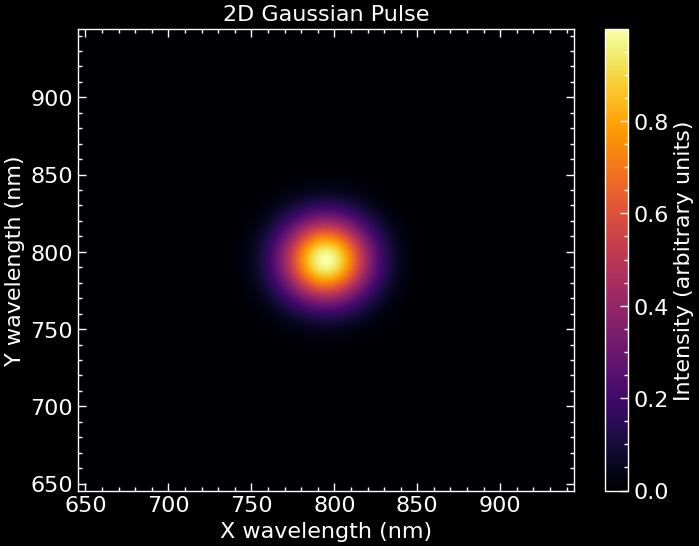

In [15]:
scale_factor = 1e9  # (m) to (nm) 

# 4. Calcular el 'extent' para imshow usando los valores min/max de las mallas X e Y
# imshow necesita (izquierda, derecha, abajo, arriba)
extent_values = (X_data.min() * scale_factor,
                 X_data.max() * scale_factor,
                 Y_data.min() * scale_factor,
                 Y_data.max() * scale_factor)

# 5. Plotear el pulso 2D
plt.figure()
plt.imshow(Z_data,
           cmap='inferno',
           extent=extent_values, 
           aspect='auto',
           origin='lower') # Importante para asegurar que el origen (0,0) esté en la parte inferior izquierda

plt.colorbar(label='Intensity (arbitrary units)')
plt.xlabel(f'X wavelength (nm)') 
plt.ylabel(f'Y wavelength (nm)')
plt.title('2D Gaussian Pulse') 

plt.show()